<a href="https://colab.research.google.com/github/mohamedyasin11/Rental-Property-Prices/blob/main/Smart_Predictive_Modeling_for_Rental_Property_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smart Predictive Modeling for Rental Property Prices**

In [1]:
# libarary for predictive modeling for rental price
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate,KFold, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler,OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/House_Rent_Train - House_Rent_Prediction.csv')
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


# **Exploratory Data Analysis**

In [3]:
data.shape

(20555, 25)

In [4]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [5]:
data['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3', nan], dtype=object)

In [6]:
# Mapping dictionary to standardize the values
type_mapping = {'1BHK1': 'BHK1','BHK1': 'BHK1','BHK2': 'BHK2','BHK3': 'BHK3','BHK4': 'BHK4',
    'BHK4PLUS': 'BHK4PLUS','RK1': 'RK1','bhk2': 'BHK2','bhk3': 'BHK3'}

# Replace the values in the 'type' column using the mapping dictionary
data['type'] = data['type'].replace(type_mapping)



In [7]:
data['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', nan],
      dtype=object)

<Axes: xlabel='rent', ylabel='Density'>

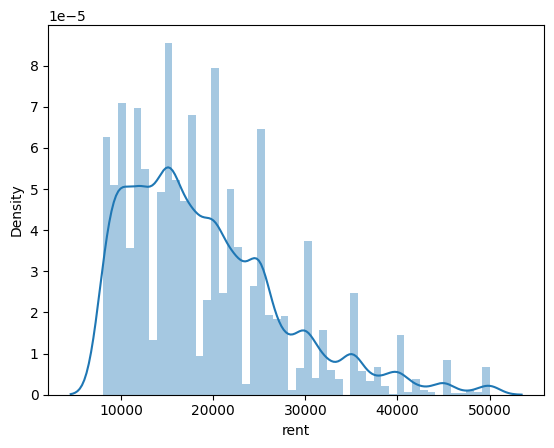

In [8]:
# distribution of rent
sns.distplot(data['rent'])

<Axes: xlabel='type'>

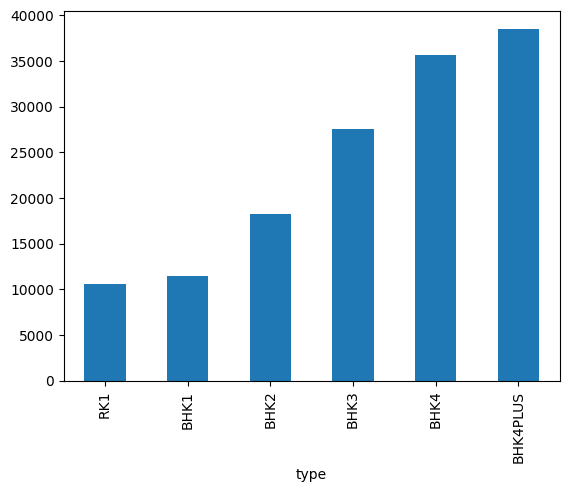

In [ ]:
data.groupby('type')['rent'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='building_type'>

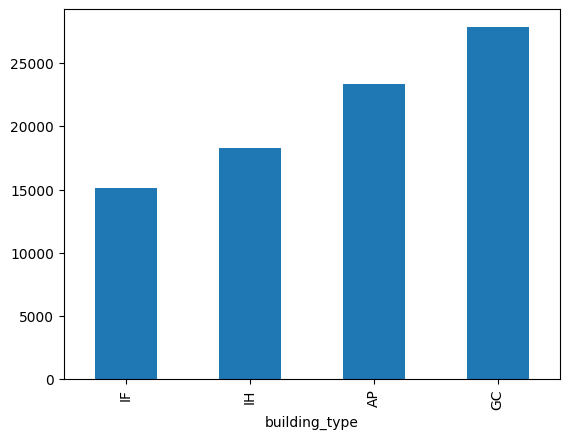

In [ ]:
data.groupby('building_type')['rent'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='water_supply'>

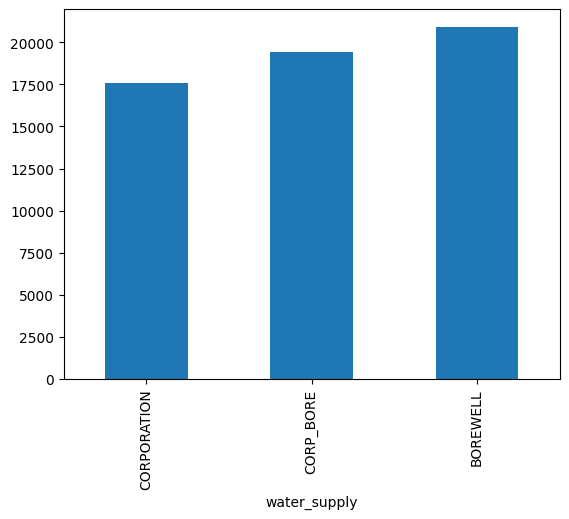

In [ ]:
data.groupby('water_supply')['rent'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='lease_type'>

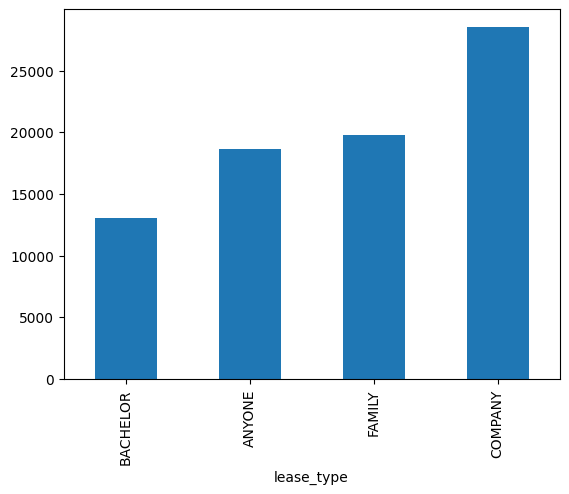

In [ ]:
data.groupby('lease_type')['rent'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='gym'>

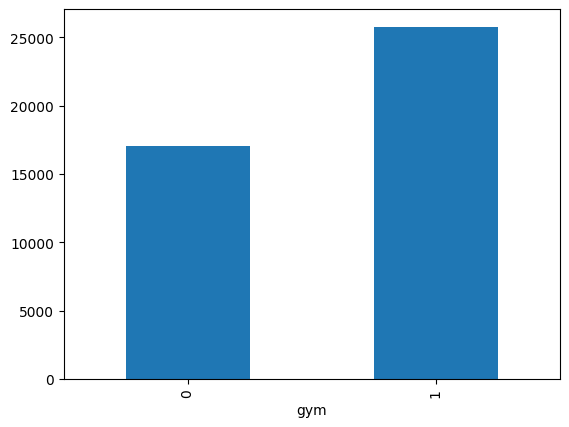

In [ ]:
data.groupby('gym')['rent'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='furnishing'>

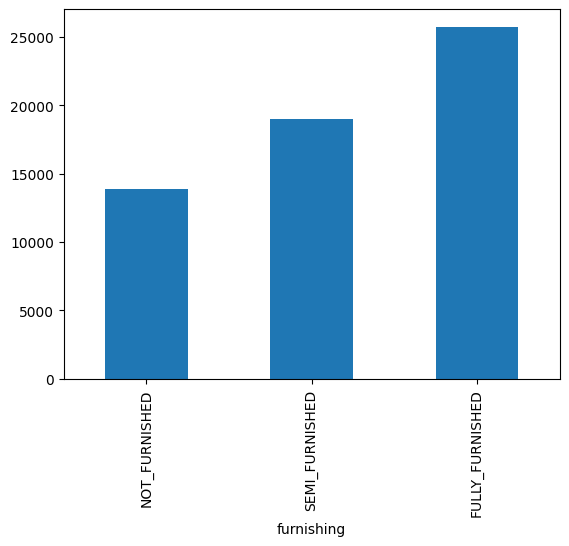

In [ ]:
data.groupby('furnishing')['rent'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='cup_board'>

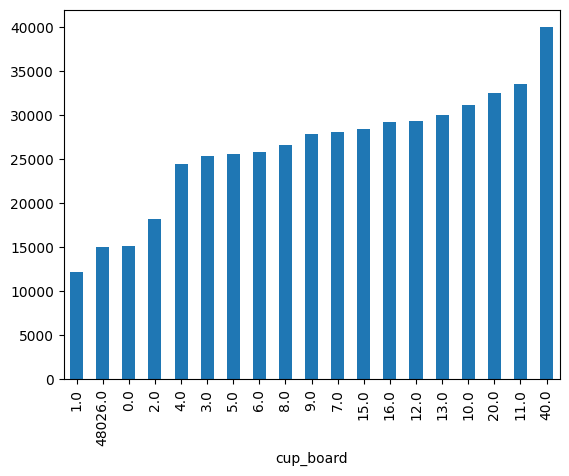

In [ ]:
data.groupby('cup_board')['rent'].mean().sort_values().plot(kind='bar')

In [ ]:
data.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

note: from this we convert activation_date to datetime

In [ ]:
data.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20532.000000,20532.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,12.945748,77.637295,0.227049,0.362053,0.174848,0.711603,1062.017465,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148
std,0.029601,0.110525,0.418935,0.480606,0.379846,0.453028,591.207446,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1285.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


**Observations:**

There are likely outliers in features like property size, property age, bathroom count, cup board count, and rent.

The presence of negative values in the property age column may be an error or missing data that needs to be addressed.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [ ]:
data.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

For the target variable 'rent', we might choose to drop rows with missing values since it's the variable we trying to predict


In [ ]:
#
data[data['rent'].isnull()]

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20532,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20533,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20534,3,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20535,4,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20536,5,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20537,6,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20538,7,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20539,8,BHK3,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20540,9,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20541,10,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Handling missing values**

In [9]:
data.dropna(subset=['rent'], inplace=True)

In [10]:
# Replace '/' with '-' in the 'activation_date' column
data['activation_date'] = data['activation_date'].str.replace('/', '-')

# Convert to datetime
data['activation_date'] = pd.to_datetime(data['activation_date'], format='%d-%m-%Y %H:%M', errors='coerce')

In [ ]:


# geolocator = Nominatim(user_agent="my_geocoder")

# # Function to get locality based on latitude and longitude
# def get_locality(row):
#     if pd.isnull(row['locality']):
#         location = geolocator.reverse((row['latitude'], row['longitude']), language='en')
#         return location.address.split(",")[-2].strip()
#     else:
#         return row['locality']

# # Apply the function to fill missing 'locality' values
# data['locality'] = data.apply(get_locality, axis=1)

In [11]:
# Display the DataFrame with the updated 'type' column
print(data['type'].unique())
type_mean_property_size = data.groupby('type')['property_size'].mean()
type_mean_property_size

['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS' nan]


type
BHK1         582.611742
BHK2        1019.644477
BHK3        1580.123664
BHK4        2285.618026
BHK4PLUS    2538.709677
RK1          351.790235
Name: property_size, dtype: float64

In [12]:
# Assuming 'data' is your DataFrame

average_sizes = {
    'BHK1': 582.611742,
    'BHK2': 1019.644477,
    'BHK3': 1580.123664,
    'BHK4': 2285.618026,
    'BHK4PLUS': 2538.709677,
    'RK1': 351.790235
}

# Define the order for imputing based on property size
type_order = ['RK1', 'BHK1', 'BHK2', 'BHK3', 'BHK4', 'BHK4PLUS']

# Function to fill missing 'type' values based on property size and order
def fill_type_based_on_size(row):
    if pd.isnull(row['type']):
        property_size = row['property_size']
        for house_type in type_order:
            avg_size = average_sizes[house_type]
            if avg_size - 100 < property_size < avg_size + 100:
                return house_type
    return row['type']

# Apply the function to fill missing 'type' values
data['type'] = data.apply(fill_type_based_on_size, axis=1)

# Display the DataFrame with the updated 'type' column
print(data['type'].unique())


['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS' nan]


In [13]:
data[data['type'].isnull()]['property_size']

20487    1470
20488    1400
20493    1400
20494    1400
20503    1470
20504    1400
20509    1400
20510    1400
20519    1470
20520    1400
20525    1400
20526    1400
Name: property_size, dtype: int64

In [14]:
data['type'].fillna('BHK3', inplace=True)

In [15]:
data.isnull().sum()

id                   0
type                 0
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [16]:
data[data['property_age']<0]['property_age']

302     -1.0
454     -1.0
2479    -1.0
2531    -1.0
3826    -1.0
4484    -1.0
5198    -1.0
6611    -1.0
7042    -1.0
7223    -1.0
7257    -1.0
8491    -1.0
8538    -1.0
9966    -1.0
10009   -1.0
10110   -1.0
10124   -1.0
10652   -1.0
11049   -1.0
11263   -1.0
11272   -1.0
11657   -1.0
12485   -1.0
13395   -1.0
13857   -1.0
14300   -1.0
14824   -1.0
15884   -1.0
17841   -1.0
17900   -1.0
17929   -1.0
19723   -1.0
19945   -1.0
Name: property_age, dtype: float64

In [17]:
# Replace -1.0 with 1 in the 'property_age' column
data['property_age'] = data['property_age'].replace(-1.0, 1.0)

In [18]:
data[data['property_age']<0]['property_age']

Series([], Name: property_age, dtype: float64)

# **Encode Categorical Variables**


In [19]:
# drop the id column
data.drop(['id','locality','activation_date','amenities'], axis=1, inplace=True)

In [20]:
categorical = ['type','lease_type','furnishing','parking','facing','water_supply','building_type']

In [21]:
for i in categorical:
  print(i)
  print(data[i].unique())
  print(data[i].nunique())
  print('\n')

type
['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS']
6


lease_type
['FAMILY' 'ANYONE' 'BACHELOR' 'COMPANY']
4


furnishing
['SEMI_FURNISHED' 'FULLY_FURNISHED' 'NOT_FURNISHED']
3


parking
['BOTH' 'TWO_WHEELER' 'NONE' 'FOUR_WHEELER']
4


facing
['E' 'NE' 'S' 'N' 'SE' 'W' 'NW' 'SW']
8


water_supply
['CORP_BORE' 'CORPORATION' 'BOREWELL']
3


building_type
['AP' 'IH' 'IF' 'GC']
4




In [22]:
data['type']= data['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
data['lease_type']= data['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
data['furnishing']= data['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
data['parking']= data['parking'].map({'NONE':0,'TWO_WHEELER':1,'FOUR_WHEELER':2,'BOTH':3})
data['facing']= data['facing'].map({'N':0,'S':1,'E':2,'W':3,'NE':4,'NW':5,'SE':6,'SW':7})
data['water_supply']= data['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
data['building_type']= data['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [23]:
# # Ordinal Columns
# ordinal_encoder = OrdinalEncoder()
# data[categorical] = ordinal_encoder.fit_transform(data[categorical])
data.head()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
0,2,12.934471,77.634471,2,1,1,1,0,1,3,...,25.0,2.0,2,2.0,6.0,12.0,1,2,2.0,40000.0
1,2,12.929557,77.672280,1,0,1,0,1,1,3,...,4.0,2.0,4,2.0,3.0,4.0,0,2,2.0,22000.0
2,3,12.982870,80.262012,2,0,1,0,0,1,3,...,6.0,3.0,2,3.0,1.0,5.0,1,2,3.0,28000.0
3,1,12.955991,77.531634,2,0,0,0,1,1,1,...,3.0,1.0,2,1.0,1.0,2.0,0,1,0.0,8000.0
4,3,12.963903,77.649446,2,0,0,0,1,1,3,...,15.0,3.0,2,4.0,0.0,0.0,0,1,1.0,45000.0


# **outliers Detection**

In [24]:
data.describe()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
count,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,...,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,2.012614,12.945748,77.637295,1.473359,0.226865,0.361777,0.174849,0.711572,0.987678,2.074031,...,5.773135,1.858465,1.645772,4.549922,1.874050,3.801335,0.822959,0.983928,1.149523,19056.733148
std,0.746715,0.029601,0.110525,0.558690,0.418815,0.480526,0.379847,0.453042,0.355991,1.037448,...,6.348067,0.710926,1.290851,335.154787,2.183982,3.183697,0.668657,0.940971,0.993549,8434.029016
min,0.000000,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,2.000000,12.918176,77.572068,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,12500.000000
50%,2.000000,12.943790,77.633506,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,...,5.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,17500.000000
75%,2.000000,12.970979,77.695723,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,...,10.000000,2.000000,2.000000,3.000000,2.000000,4.000000,1.000000,2.000000,2.000000,24000.000000
max,5.000000,12.999999,80.266346,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,400.000000,21.000000,7.000000,48026.000000,25.000000,26.000000,2.000000,3.000000,13.000000,50000.000000


In [25]:
data['property_size'].describe()

count    20532.000000
mean      1061.938145
std        591.320502
min          1.000000
25%        700.000000
50%       1047.000000
75%       1284.000000
max      50000.000000
Name: property_size, dtype: float64

observations
outliers possiblities
property_size, property_age, bathroom, cup_board,balconies

In [26]:
data[data['cup_board']==48026.000000]

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
19153,2,12.932136,77.566706,2,0,0,0,1,1,2,...,10.0,1.0,0,48026.0,1.0,2.0,1,0,0.0,15000.0


In [27]:
data['cup_board'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    20532.000000
mean         4.549922
std        335.154787
min          0.000000
1%           0.000000
5%           0.000000
10%          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          4.000000
95%          5.000000
99%          8.000000
max      48026.000000
Name: cup_board, dtype: float64

In [28]:
data[data['property_age']==400]

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
12769,2,12.955611,77.722438,1,0,0,0,1,0,3,...,400.0,1.0,2,0.0,0.0,2.0,2,0,0.0,25000.0


In [29]:
data['property_age'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    20532.000000
mean         5.773135
std          6.348067
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          1.000000
50%          5.000000
75%         10.000000
90%         12.000000
95%         15.000000
99%         25.000000
max        400.000000
Name: property_age, dtype: float64

In [30]:
data[data['property_size']==50000.000000]

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
6075,2,12.950302,77.710188,1,0,0,0,1,1,1,...,1.0,2.0,0,2.0,2.0,4.0,1,0,0.0,16000.0


In [31]:
data['property_size'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    20532.000000
mean      1061.938145
std        591.320502
min          1.000000
1%         250.000000
5%         400.000000
10%        500.000000
25%        700.000000
50%       1047.000000
75%       1284.000000
90%       1600.900000
95%       1840.000000
99%       2439.690000
max      50000.000000
Name: property_size, dtype: float64

In [32]:
data[data['balconies']==13.0]

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
2431,3,12.945015,77.628737,0,0,0,0,1,2,1,...,5.0,21.0,4,3.0,0.0,2.0,1,1,13.0,27000.0


In [33]:
data['balconies'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    20532.000000
mean         1.149523
std          0.993549
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
90%          2.000000
95%          3.000000
99%          4.000000
max         13.000000
Name: balconies, dtype: float64

In [34]:
data[data['bathroom']==21.0]['property_size']

2431    1100
Name: property_size, dtype: int64

In [35]:
data['bathroom'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    20532.000000
mean         1.858465
std          0.710926
min          1.000000
1%           1.000000
5%           1.000000
10%          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
90%          3.000000
95%          3.000000
99%          4.000000
max         21.000000
Name: bathroom, dtype: float64

<Axes: xlabel='property_size'>

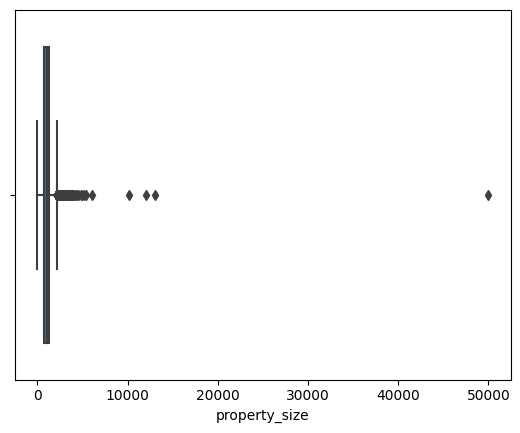

In [36]:
# boxplot to visualize outliers in data
sns.boxplot(x=data['property_size'])

In [37]:
def handle_outliers(df, columns):
    for col in columns:
        # Calculate the IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace values outside the bounds with lower and upper bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Specify the columns to handle outliers
columns_to_handle_outliers = ['property_size', 'property_age', 'bathroom', 'cup_board', 'balconies']

# Apply the function to handle outliers
data_handled_outliers = handle_outliers(data, columns_to_handle_outliers)

# Display the shape before and after handling outliers
print(f"Shape before handling outliers: {data.shape}")
print(f"Shape after handling outliers: {data_handled_outliers.shape}")

# Summary statistics after handling outliers
summary_stats_handled_outliers = data_handled_outliers.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(summary_stats_handled_outliers)


Shape before handling outliers: (20532, 21)
Shape after handling outliers: (20532, 21)
               type      latitude     longitude    lease_type           gym  \
count  20532.000000  20532.000000  20532.000000  20532.000000  20532.000000   
mean       2.012614     12.945748     77.637295      1.473359      0.226865   
std        0.746715      0.029601      0.110525      0.558690      0.418815   
min        0.000000     12.900004     77.500072      0.000000      0.000000   
1%         0.000000     12.900732     77.506934      0.000000      0.000000   
5%         1.000000     12.904041     77.521522      1.000000      0.000000   
10%        1.000000     12.907289     77.537735      1.000000      0.000000   
25%        2.000000     12.918176     77.572068      1.000000      0.000000   
50%        2.000000     12.943790     77.633506      1.000000      0.000000   
75%        2.000000     12.970979     77.695723      2.000000      0.000000   
90%        3.000000     12.987453     77.730

# **Feature Selection and Engineering**

In [38]:
correlation_matrix = data.corr()

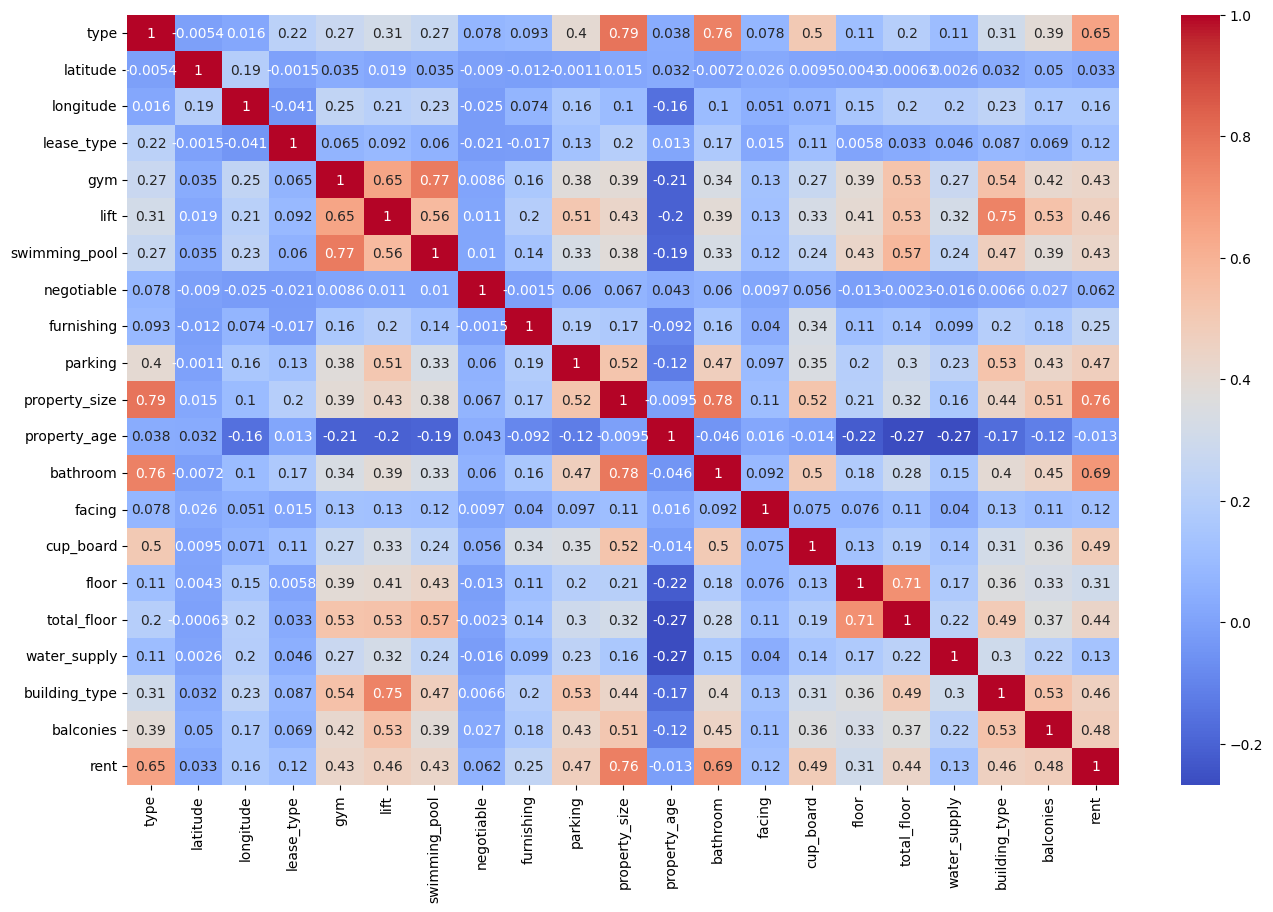

In [39]:
# heatmap to visualize correlation
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [40]:
# Set a correlation threshold
correlation_threshold = 0.8

# Find and display pairs of highly correlated features
highly_correlated = {}
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    if len(correlated_cols) > 1:
        highly_correlated[col] = correlated_cols

print("Pairs of highly correlated features:")
print(highly_correlated)

Pairs of highly correlated features:
{}


In [41]:
X = data.drop('rent', axis=1)
y = data['rent']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = model.feature_importances_

In [42]:
feature_importances

array([0.02673852, 0.05442811, 0.13903809, 0.00702368, 0.0024198 ,
       0.00704027, 0.00401722, 0.00379472, 0.01498761, 0.01073871,
       0.59918711, 0.01987033, 0.02498793, 0.01033539, 0.01106149,
       0.01075862, 0.03197584, 0.00534275, 0.00769427, 0.00855955])

In [43]:
# Create a model-based feature selection object
sfm = SelectFromModel(RandomForestRegressor(), threshold=-np.inf, max_features=15)

# Fit the SelectFromModel object
sfm.fit(X, y)  # X is your feature matrix, and y is your target variable

# Get the selected features
selected_features = X.columns[sfm.get_support()]

# Get the mask of selected features (True for selected, False for not selected)
feature_mask = sfm.get_support()

# Print the selected features
print("Selected Features:", selected_features)

# Print the mask of selected features
print("Feature Mask:", feature_mask)

# Print the features that are considered necessary
print("Necessary Features:", X.columns[feature_mask])

# Print the features that are considered unnecessary
print("Unnecessary Features:", X.columns[~feature_mask])

Selected Features: Index(['type', 'latitude', 'longitude', 'lift', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'building_type', 'balconies'],
      dtype='object')
Feature Mask: [ True  True  True False False  True False False  True  True  True  True
  True  True  True  True  True False  True  True]
Necessary Features: Index(['type', 'latitude', 'longitude', 'lift', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'building_type', 'balconies'],
      dtype='object')
Unnecessary Features: Index(['lease_type', 'gym', 'swimming_pool', 'negotiable', 'water_supply'], dtype='object')


# **model building , model evaluation and hyperparameter tuning**

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the scaler on the training set and transform both training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# both scaling and non scaling there is no difference in accuracy of models so we can go with non scaling

In [45]:
# Define individual regression models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Create a stack of models with a meta-regressor
models = [('linear_reg', linear_reg),
          ('decision_tree', decision_tree),
          ('random_forest', random_forest),
          ('gradient_boosting', gradient_boosting)]

stacked_model = StackingRegressor(estimators=models, final_estimator=LinearRegression())

In [46]:
# Evaluate individual models
models_to_evaluate = {
    'Linear Regression': linear_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Stacked Model': stacked_model
}

for name, model in models_to_evaluate.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} - Mean Squared Error: {mse}")

# Evaluate models using cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_to_evaluate.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    mse_mean = -scores.mean()
    print(f"{name} - Cross-validated Mean Squared Error: {mse_mean}")


Linear Regression - Mean Squared Error: 23625336.02194679
Decision Tree - Mean Squared Error: 27805574.252739225
Random Forest - Mean Squared Error: 13761807.06851478
Gradient Boosting - Mean Squared Error: 14782366.90859405
Stacked Model - Mean Squared Error: 13377156.70627387
Linear Regression - Cross-validated Mean Squared Error: 23400019.22893598
Decision Tree - Cross-validated Mean Squared Error: 27400540.93832572
Random Forest - Cross-validated Mean Squared Error: 14066235.325429251
Gradient Boosting - Cross-validated Mean Squared Error: 14856573.891984563
Stacked Model - Cross-validated Mean Squared Error: 13671224.832785264


In [47]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [60]:
linear_reg.score(X_test,y_test)

0.7943933784544468

In [58]:
random_forest.score(X_test,y_test)

0.8085882541533971

In [64]:
stacked_model.score(X_test,y_test)

0.8139383216997957

In [50]:
pred =linear_reg.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print(mae)

3612.3859108478905


In [52]:
mse = mean_squared_error(y_test,pred)
print(mse)

23625336.02194679


In [63]:
features = [2.0	,12.963903,	77.649446	,3.0,	0	,0,	0,	1	,2.0	,0.0,	1500.0	,15.0	,3.0	,0.0	,4.0	,0.0,	0.0	,1.0,	3.0	,1.0]
predict = stacked_model.predict([features])[0]
print("Predicted rent:",round(abs(predict)))

Predicted rent: 33171


In [65]:
import pickle
filename = 'Property_Rental_Price.sav'
pickle.dump(stacked_model, open(filename, 'wb'))

In [67]:
import pickle
filename = 'Property_Rental_Price_RF.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [ ]:
Property_Rental_Price = pickle.load(open('Property_Rental_Price.sav', 'rb'))

In [ ]:
stacked_model.score(X_test,y_test)

0.8106019666242179

In [ ]:
X

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies
0,1.0,12.934471,77.634471,3.0,1,1,1,0,2.0,0.0,1250.0,23.5,2.0,0.0,2.0,6.0,12.0,2.0,0.0,2.0
1,1.0,12.929557,77.672280,0.0,0,1,0,1,2.0,0.0,1400.0,4.0,2.0,2.0,2.0,3.0,4.0,1.0,0.0,2.0
2,2.0,12.982870,80.262012,3.0,0,1,0,0,2.0,0.0,1350.0,6.0,3.0,0.0,3.0,1.0,5.0,2.0,0.0,3.0
3,0.0,12.955991,77.531634,3.0,0,0,0,1,2.0,3.0,600.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0
4,2.0,12.963903,77.649446,3.0,0,0,0,1,2.0,0.0,1500.0,15.0,3.0,0.0,4.0,0.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,2.0,12.925380,77.524397,0.0,1,1,1,1,2.0,0.0,1650.0,1.0,3.0,0.0,3.0,4.0,4.0,0.0,0.0,2.0
20528,1.0,12.931072,77.632361,0.0,0,0,0,1,2.0,0.0,1000.0,10.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0
20529,1.0,12.901800,77.566597,3.0,1,1,0,1,2.0,0.0,1000.0,0.0,2.0,7.0,2.0,5.0,5.0,0.0,0.0,2.0
20530,1.0,12.965502,77.647694,3.0,0,1,0,0,2.0,0.0,1000.0,5.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,3.0


In [ ]:
features = [2.0	,12.963903,	77.649446	,3.0,	0	,0,	0,	1	,2.0	,0.0,	1500.0	,15.0	,3.0	,0.0	,4.0	,0.0,	0.0	,1.0,	3.0	,1.0]

In [ ]:
predict = model.predict([features])[0]

In [ ]:
print("Predicted rent:",round(abs(predict)))         # 437276

Predicted rent: 437276


In [ ]:
# Get the mapping of original categories to encoded values
encoded_mapping = {}
for i, column in enumerate(categorical):
    encoded_mapping[column] = {category: encoded_value for category, encoded_value in zip(data[column].unique(), data[][:, i])}

# Display the encoded mapping
print(encoded_mapping)

InvalidIndexError: ignored

# **MODEL BASED ON SELECTED FEATURES**

In [ ]:
selected_features

Index(['type', 'latitude', 'longitude', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor'],
      dtype='object')

In [ ]:
X1 = data[selected_features]
X1.head()

,type,latitude,longitude,lift,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,building_type,balconies
0,1.0,12.934471,77.634471,1,2.0,0.0,1250.0,23.5,2.0,0.0,2.0,6.0,12.0,0.0,2.0
1,1.0,12.929557,77.672280,1,2.0,0.0,1400.0,4.0,2.0,2.0,2.0,3.0,4.0,0.0,2.0
2,2.0,12.982870,80.262012,1,2.0,0.0,1350.0,6.0,3.0,0.0,3.0,1.0,5.0,0.0,3.0
3,0.0,12.955991,77.531634,0,2.0,3.0,600.0,3.0,1.0,0.0,1.0,1.0,2.0,3.0,0.0
4,2.0,12.963903,77.649446,0,2.0,0.0,1500.0,15.0,3.0,0.0,4.0,0.0,0.0,3.0,1.0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the scaler on the training set and transform both training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Evaluate individual models
models_to_evaluate = {
    'Linear Regression': linear_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Stacked Model': stacked_model
}

for name, model in models_to_evaluate.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} - Mean Squared Error: {mse}")

# Evaluate models using cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models_to_evaluate.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    mse_mean = -scores.mean()
    print(f"{name} - Cross-validated Mean Squared Error: {mse_mean}")

Linear Regression - Mean Squared Error: 23391099.378788676
Decision Tree - Mean Squared Error: 28702077.03944485
Random Forest - Mean Squared Error: 14111743.786362909
Gradient Boosting - Mean Squared Error: 15075500.125383973
Stacked Model - Mean Squared Error: 13684526.682324417
Linear Regression - Cross-validated Mean Squared Error: 23377231.188056532
Decision Tree - Cross-validated Mean Squared Error: 28715770.905266363
Random Forest - Cross-validated Mean Squared Error: 14323619.865823325
Gradient Boosting - Cross-validated Mean Squared Error: 15209641.157075867
Stacked Model - Cross-validated Mean Squared Error: 13902988.965510478


In [ ]:
stacked_model.score(X_test,y_test)

0.8096631401452404